In [115]:
import numpy as np
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [116]:
df = pd.read_csv("CC_GENERAL.csv")

In [117]:
vals_eval = df.iloc[: , 1:]
vals_eval = vals_eval.fillna(vals_eval.median())
type(vals_eval.values)

numpy.ndarray

In [118]:
def random_sample(arr, num_samples):
    
    sample_idx =np.random.randint(0, arr.shape[0], size=num_samples)
    
    sampled_pts = []
    
    for i in sample_idx:
        sampled_pts.append(arr[i])
    
    sampled_pts = np.array(sampled_pts)
    
    return (sampled_pts)
k = random_sample(vals_eval.values, 500)
print (k)

[[1.91524563e+03 1.00000000e+00 3.90000000e+01 ... 8.14880073e+02
  0.00000000e+00 1.20000000e+01]
 [1.91333253e+02 1.00000000e+00 6.37190000e+02 ... 1.68015528e+02
  0.00000000e+00 1.20000000e+01]
 [3.69969469e+03 1.00000000e+00 0.00000000e+00 ... 1.69853810e+03
  0.00000000e+00 1.20000000e+01]
 ...
 [6.70120718e+02 1.00000000e+00 0.00000000e+00 ... 5.91573521e+02
  5.00000000e-01 1.20000000e+01]
 [1.16725497e+03 1.00000000e+00 4.99920000e+02 ... 1.35843464e+03
  0.00000000e+00 1.20000000e+01]
 [9.66982890e+01 1.00000000e+00 1.05228000e+03 ... 1.80400196e+02
  8.33333000e-01 1.20000000e+01]]


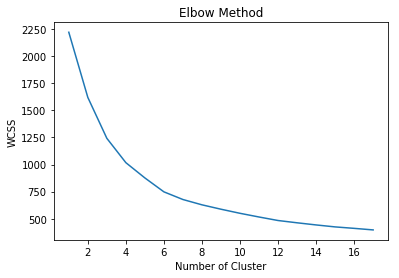

In [119]:
distortions = []
X = vals_eval.values
X = preprocessing.normalize(X, norm='l2')
K = range(1, 10)

# for k in K:
#     kmm = KMeans(n_clusters=k)
#     kmm.fit(X)
#     distortions.append(sum(np.min(cdist(X, kmm.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()

wcss = []
for i in range(1,18):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,18), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()



In [120]:

kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [121]:
kmeans.labels_

array([0, 2, 0, ..., 0, 0, 3], dtype=int32)

In [122]:
df['Cluster'] = y_kmeans
#df.head()
df.loc[df['Cluster']==1].values[:, 1:-1].shape

(980, 17)

In [123]:
arr_cluster = range(min(df['Cluster'].values), max(df['Cluster'].values) + 1)
stratified_samples = {}

def stratified_sampling(clustered_df, num_samples):
    
    #inp_arr = clustered_df.loc[clustered_df['Cluster']==2].values[:, 1:-1]
    #print (inp_arr.shape)
    factor = num_samples // len(arr_cluster)
    print (factor)
    for i in range(len(arr_cluster)):
        inp_arr = clustered_df.loc[clustered_df['Cluster']==i].values[:, 1:-1]
        stratified_samples[i] = random_sample(inp_arr, factor)
    return stratified_samples
kk = stratified_sampling(df, 400)
print (kk[0].shape)
    
    

66
(66, 17)


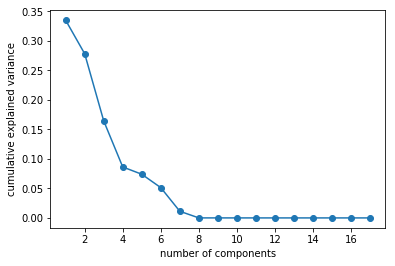

In [133]:
pca = PCA().fit(X)
plt.plot(np.arange(1, 18, 1), (pca.explained_variance_ratio_), marker='o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

[3.34773820e-01 2.78012239e-01 1.64327912e-01 8.62803811e-02
 7.39752092e-02 5.12902532e-02 1.12658836e-02 3.36827287e-05
 2.28645804e-05 1.37651356e-05 3.81393544e-06 8.83309671e-08
 3.58477898e-08 3.35441922e-08 1.29132032e-08 3.19073630e-09
 1.22550999e-09] (17,)
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205

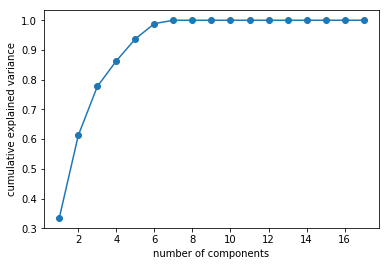

In [140]:
pca = PCA().fit(X)
plt.plot(np.arange(1, 18, 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print (pca.explained_variance_ratio_, pca.explained_variance_ratio_.shape)
print (df.head())

In [138]:
pca = PCA(n_components=7).fit(X)
order_components_variance = pca.components_
#print (order_components_variance)
print (pca.explained_variance_ratio_, pca.explained_variance_ratio_.shape)

[0.33477382 0.27801224 0.16432791 0.08628038 0.07397521 0.05129025
 0.01126588] (7,)
